# 神經網路架構
## LeNet(1998)
卷積網路的始祖，與現在的卷積網路差別在於，隱藏層是使用**Sigmoid**
![alt text](https://miro.medium.com/max/850/1*AwJZkWLKabIicUPzSN6KCg.png "Title")

## AlexNet(2012)
相比於LeNet，其架構更深且隱藏層是改成**ReLU**及加入Dropout層
![alt text](https://www.frontiersin.org/files/Articles/454348/fpsyt-10-00205-HTML/image_m/fpsyt-10-00205-g002.jpg "Title")

## VGG(2014)
有許多版本，如VGG11、VGG13、VGG16和VGG19等。主要的差異在於卷積層的數量，其主要架構是卷積層加上全連階層。  
VGG的特點是卷積層的Kernel都是使用 3 x 3 大小，主要的原因是使用多個 3 x 3 的卷積層堆疊，一樣可以達到 5 x 5 、 7 x 7 、 9 x 9 相同的效果，但參數量卻可大幅減少。  
ex. 兩個(3 x 3)和一個(5 x 5)Kernel  
輸入(7 x 7)經過兩個(3 x 3)得到輸出(3 x 3)，同樣輸入(7 x 7)給一個(5 x 5)會輸出(3 x 3)。  
雖然輸出相同，但兩個(3 x 3)只需要18個參數，一個(5 x 5)卻需要25個參數。
![alt text](https://miro.medium.com/max/1400/1*NNifzsJ7tD2kAfBXt3AzEg.png "Title")

## GoogLeNet(2014)
由Google所提出的架構，又稱為Inception V1。此模型提出了全新的架構「Inception Block」，最初的構想是為了免去搭建網路時的煩惱，如需要多大的Kernel，或是否需要池化層。所以其架構是對每一層輸出都做1x1、3x3、5x5的卷積和3x3的池化。
![alt text](http://nooverfit.com/wp/wp-content/uploads/2017/10/QQ%E6%88%AA%E5%9B%BE20171023154353.png "Title")
而為了減少此架構的參數量及計算量，提出了Inception Block改良版。
![alt text](https://www.researchgate.net/profile/Bo-Zhao-67/publication/312515254/figure/fig3/AS:489373281067012@1493687090916/nception-module-of-GoogLeNet-This-figure-is-from-the-original-paper-10.png "Title")
ex. 輸入(36x36x128)希望經過卷積後得到(36x36x64)大小的輸出  
**原版:**  
總參數量 = 輸入維度 x Kernel大小 x Kernel數量 = 128 x (3 x 3) x 64 = 73,728  
總乘法計算量 =  總參數量 x 滑動次數 = 73728 x (36 x 36) = 95,551,488  
**改良版:**  
總參數量 = 128 x (1 x 1) x 16 + 16 x (3 x 3) 64 = 2,048 + 9,216 = 11,264
總乘法計算量 =  (36 x 36) * 2048 + (36 x 36) x 9216 = 2,654,208 + 11,943,936 = 14,598,144  

GoogLeNet後續也推出新版本:  
1. GoogLeNet(2014): 使用Inception Block的改良版  
2. Inception-V2(2015): 使用兩個(3 x 3)代替(5 x 5)  
3. Inception-V3(2016): 使用(1 x n)和(n x 1)代替(n x n)的卷積  
4. Inception-V4(2017): 加入ResNet的Shortcut概念  
5. Xception(2017): 全名Extreme Inception，引入Depthwise Separable Conv

## ResNet(2015)
由Microsoft推出，其層數為152層，是GoogLeNet(22層)的7倍多，但錯誤率卻降到3.6%。
![alt text](https://editor.analyticsvidhya.com/uploads/38371XTo6Q.png "Title")
一般來說，隨著網路層的疊加，正確率應該越高才對，但實際上是相反的，這並不是過擬合的問題，而是退化問題(Degradation problem)。  
所以ResNet這篇論文提出了殘差(Residual)架構。

**Residual Block:**  
關鍵在於**Identity**或稱為**Shortcut**。其原理在於，Residual將已經學習過的特徵直接傳到輸出，而不要重新開始學習，因為如此會影響學習效率。
![alt text](https://miro.medium.com/max/1496/1*D0F3UitQ2l5Q0Ak-tjEdJg.png "Title")

# 實驗：實作Inception V3網路架構
有兩種方法搭建，Keras Applications 和 TensorFlow Hub

## Keras Applications
<img src="img/keras_applications.jpg" width="500" style="float:left">

In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
model_1 = tf.keras.applications.InceptionV3(include_top=True, weights='imagenet')

96116736/96112376 [==============================] - 32s 0us/step


include_top: True包含FC層，False則不包含。  
weights: 載入權重的方式，預設為imagenet。  
。None: 為random initialization權重。  
。imagenet: 為ImageNet資料集上預訓練網路權重。  
。FILE_PATH: 從檔案中讀取權重。  
(選)input_tensor: 傳入tf.keras.input層。  
(選)input_shape: 設定模型輸入大小，預設為(299, 299, 3)。如要更改，include_top應設為False。  
(選)pooling: 自訂pooling的方式，須將include_top應設為False。  
。None(預設): 不加入池化層，最後一層輸出為卷積層。  
。avg: 最後一層為全域平均池化層(GlobalAveragePooling2D)。  
。max: 最後一層為全域最大池化層(GlobalMaxPooling2D)。  
(選)classes: 輸出類別數量，預設為1000。如需修改，include_top應設為True，weights須預設為None。

In [3]:
model_1.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [4]:
# 將網路模型儲存到TensorBoard上
model_tb = tf.keras.callbacks.TensorBoard(log_dir='./models/Ch8/model-1')
model_tb.set_model(model_1)

#### 資料前處理和輸出解碼
使用Keras Applications載入的模型進行預測，對於每個模型，Keras皆提供相對應的**資料前處理**和**輸出解碼(輸出類別)**的函數:  
**。preprocess_input:** 網路架構的影像前處理。  
**。decode_predictions:** 網路架構的輸出解碼，即輸出預測類別與屬於該類別的機率。

In [5]:
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions

In [6]:
# 建立影像讀取的函數
def read_img(img_path, resize=(299, 299)):
    # 讀取檔案
    img_string = tf.io.read_file(img_path)
    # 將檔案以影像格式來解碼
    img_decode = tf.image.decode_image(img_string)
    # 將影像resize到網路輸入大小
    img_decode = tf.image.resize(img_decode, resize)
    # 將影像格式增加到 4 維 (batch, height, width, channels)，模型預測要求格式
    img_decode = tf.expand_dims(img_decode, axis=0)
    return img_decode

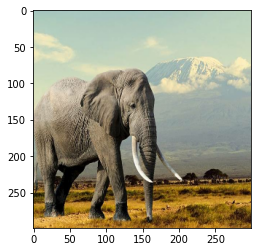

In [11]:
# 讀取影像
img_path = './img/elephant.jpg'
img = read_img(img_path)
plt.imshow(tf.cast(img, tf.uint8)[0])

In [12]:
# 預測結果
img = preprocess_input(img)
preds = model_1.predict(img)
print("Predicted:", decode_predictions(preds, top=3)[0])

40960/35363 [==================================] - 0s 0us/step
Predicted: [('n02504458', 'African_elephant', 0.6043361), ('n01871265', 'tusker', 0.31825355), ('n02504013', 'Indian_elephant', 0.02646678)]


## TensorFlow Hub
URL: https://tfhub.dev/

In [13]:
!pip install tensorflow-hub

In [15]:
import tensorflow_hub as hub

In [20]:
model_url = "https://tfhub.dev/google/tf2-preview/inception_v3/classification/3"
model_2 = tf.keras.Sequential([
    hub.KerasLayer(model_url,
                   input_shape=(299, 299, 3),
                   output_shape=(1001,),
                   name='Inception_v3')
])

In [21]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Inception_v3 (KerasLayer)    (None, 1001)              23853833  
Total params: 23,853,833
Trainable params: 0
Non-trainable params: 23,853,833
_________________________________________________________________


In [22]:
# 建立資料前處理函式
def read_img(img_path, resize=(299, 299)):
    # 讀取檔案
    img_string = tf.io.read_file(img_path)
    # 將檔案以影像格式來解碼
    img_decode = tf.image.decode_image(img_string)
    # 將影像resize到網路輸入大小
    img_decode = tf.image.resize(img_decode, resize)
    # 影像標準化，縮放到 0 ~ 1 之間
    img_decode = img_decode / 255.0
    # 將影像格式增加到 4 維 (batch, height, width, channels)，模型預測要求格式
    img_decode = tf.expand_dims(img_decode, axis=0)
    return img_decode

In [24]:
# 建立輸出編碼器
# 下載 ImageNet 的標籤檔，標籤檔案網址可以TensorFlow Hub找到
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
# 讀取標籤檔
with open(labels_path) as file:
    lines = file.read().splitlines()
# 顯示讀取的標籤
print(lines)
# 將標籤轉成 numpy array，作為網路輸出層的解碼器
imagenet_labels = np.array(lines)

16384/10484 [==============================================] - 0s 0us/step
['background', 'tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead', 'electric ray', 'stingray', 'cock', 'hen', 'ostrich', 'brambling', 'goldfinch', 'house finch', 'junco', 'indigo bunting', 'robin', 'bulbul', 'jay', 'magpie', 'chickadee', 'water ouzel', 'kite', 'bald eagle', 'vulture', 'great grey owl', 'European fire salamander', 'common newt', 'eft', 'spotted salamander', 'axolotl', 'bullfrog', 'tree frog', 'tailed frog', 'loggerhead', 'leatherback turtle', 'mud turtle', 'terrapin', 'box turtle', 'banded gecko', 'common iguana', 'American chameleon', 'whiptail', 'agama', 'frilled lizard', 'alligator lizard', 'Gila monster', 'green lizard', 'African chameleon', 'Komodo dragon', 'African crocodile', 'American alligator', 'triceratops', 'thunder snake', 'ringneck snake', 'hognose snake', 'green snake', 'king snake', 'garter snake', 'water snake', 'vine snake', 'night snake', 'boa constrictor', '

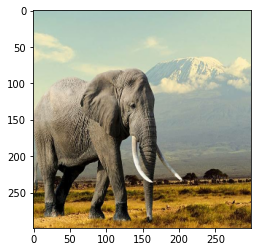

In [25]:
# 讀取影像
img_path = 'img/elephant.jpg'
img = read_img(img_path)
plt.imshow(img[0])

In [26]:
# 預測結果
preds = model_2.predict(img)
index = np.argmax(preds)
print("Predicted:", imagenet_labels[index])

Predicted: African elephant


In [28]:
# 顯示最好的三個結果
top3_indexs = np.argsort(preds)[0, ::-1][:3]
print("Predicted:", imagenet_labels[top3_indexs])

Predicted: ['African elephant' 'tusker' 'Indian elephant']
